In [18]:
import pandas as pd 
import numpy as np
import csv
import os.path
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#import for scoring the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#training using logistical regression
from sklearn.linear_model import LogisticRegression

In [2]:
#import
final_games_data = pd.read_csv(r'./Data/final_games_data.csv', dtype = np.array(np.dtype('float64')))

Text(0, 0.5, 'diff_cspm')

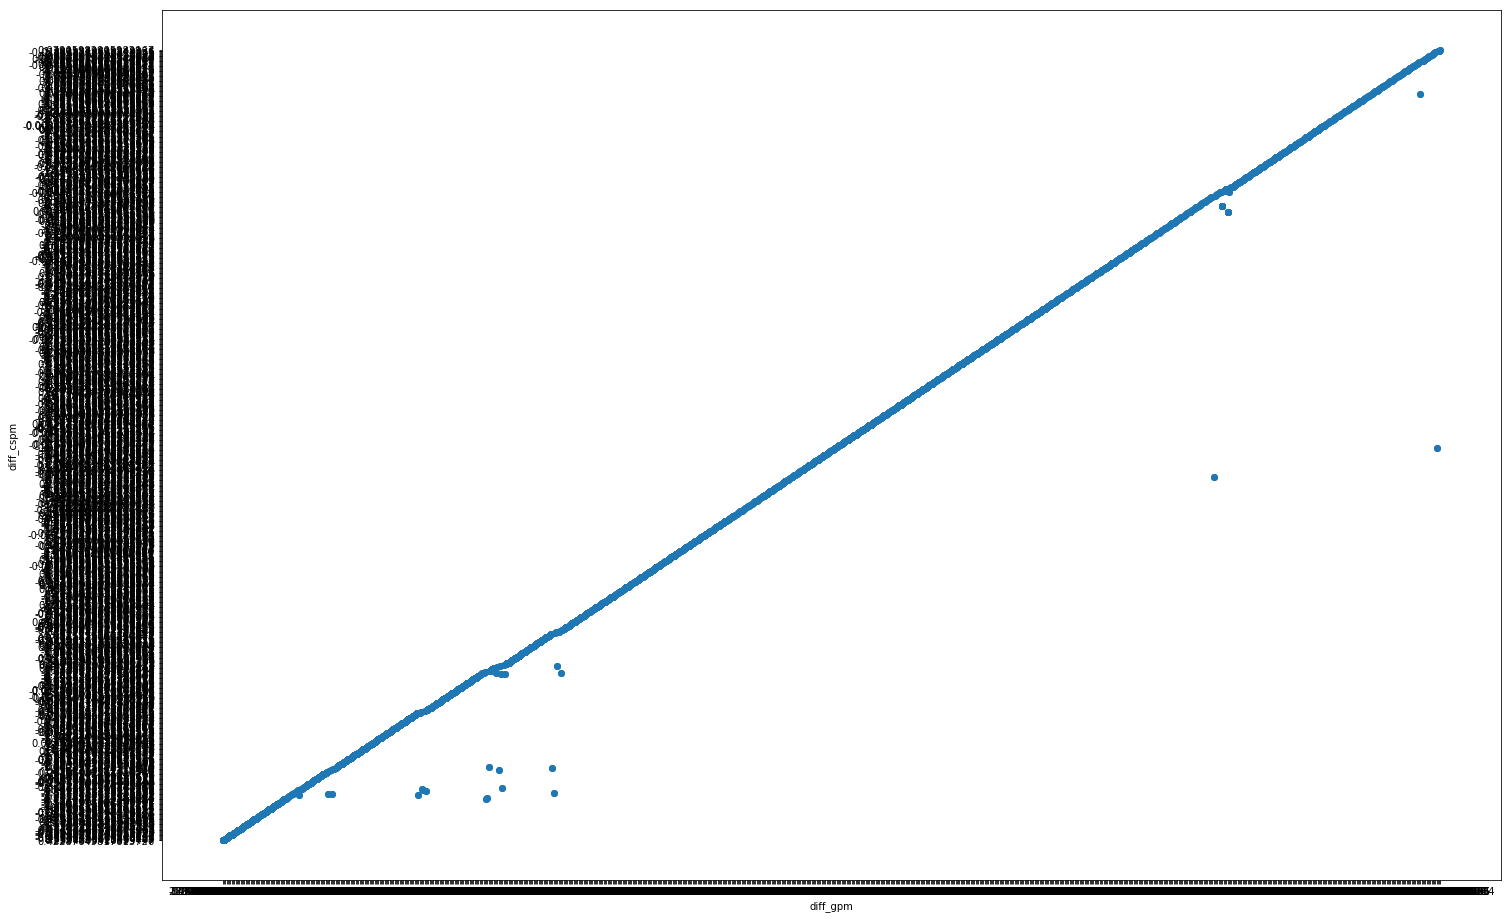

In [3]:
#plotting correlation of gpm and cspm
fig, ax = plt.subplots(figsize=(24,16))
plt.scatter(final_games_data['diff_gpm'], final_games_data['diff_cspm'])

plt.xlabel('diff_gpm')
plt.ylabel('diff_cspm')

In [4]:
#changing types to float
final_games_data['result']=final_games_data['result'].astype('float64')
final_games_data['diff_assists']=final_games_data['diff_assists'].astype('float64')
final_games_data['diff_cspm']=final_games_data['diff_cspm'].astype('float64')
final_games_data['diff_damage']=final_games_data['diff_damage'].astype('float64')
final_games_data['diff_dmgperminute']=final_games_data['diff_dmgperminute'].astype('float64')
final_games_data['diff_gpm']=final_games_data['diff_gpm'].astype('float64')
final_games_data['diff_fbaron_time']=final_games_data['diff_fbaron_time'].astype('float64')
final_games_data['diff_first_blood']=final_games_data['diff_first_blood'].astype('float64')
final_games_data['diff_firstdeath']=final_games_data['diff_firstdeath'].astype('float64')
final_games_data['diff_first_tower']=final_games_data['diff_first_tower'].astype('float64')
final_games_data['diff_match_duration']=final_games_data['diff_match_duration'].astype('float64')
final_games_data['diff_gold_spent']=final_games_data['diff_gold_spent'].astype('float64')
final_games_data['diff_herald_time']=final_games_data['diff_herald_time'].astype('float64')
final_games_data['diff_kills']=final_games_data['diff_kills'].astype('float64')
final_games_data['diff_kpm']=final_games_data['diff_kpm'].astype('float64')
final_games_data['diff_minion_kills']=final_games_data['diff_minion_kills'].astype('float64')
final_games_data['diff_drag_kills']=final_games_data['diff_drag_kills'].astype('float64')
final_games_data['diff_tower_kills']=final_games_data['diff_tower_kills'].astype('float64')
final_games_data['totalgold']=final_games_data['totalgold'].astype('float64')
final_games_data['diff_vision_wards']=final_games_data['diff_vision_wards'].astype('float64')
final_games_data['diff_monster_kills']=final_games_data['diff_monster_kills'].astype('float64')

In [5]:
#original correlation
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,diff_gold_spent,diff_herald_time,diff_kills,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_monster_kills
result,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.051576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000149
diff_assists,0.000000,1.000000,0.278641,-0.372615,0.740825,0.869177,-0.137604,-0.202254,-0.006376,-0.018689,...,0.220489,0.058223,0.965815,0.000000,-0.202059,0.558166,0.854711,0.433522,0.041524,0.512758
diff_cspm,0.000000,0.278641,1.000000,-0.498177,0.367795,0.569995,0.035834,0.155747,0.290555,0.041150,...,0.325851,0.211047,0.279484,0.000000,0.405215,0.316002,0.455393,0.453689,-0.146493,0.573340
diff_damage,0.000000,-0.372615,-0.498177,1.000000,-0.074505,-0.503279,-0.249893,-0.178704,-0.001877,0.030743,...,-0.246355,-0.089016,-0.334248,0.000000,-0.214887,-0.288578,-0.545334,-0.424930,-0.121782,-0.371269
diff_dmgperminute,0.000000,0.740825,0.367795,-0.074505,1.000000,0.722087,-0.212756,-0.128779,0.169839,0.007260,...,0.318056,0.188534,0.741327,0.000000,-0.030085,0.447662,0.670337,0.446281,-0.121738,0.528679
diff_gpm,0.000000,0.869177,0.569995,-0.503279,0.722087,1.000000,-0.207065,-0.172322,0.015634,-0.010397,...,0.177708,0.019265,0.891473,0.000000,-0.180613,0.663233,0.939757,0.418179,-0.111059,0.608544
diff_fbaron_time,0.000000,-0.137604,0.035834,-0.249893,-0.212756,-0.207065,1.000000,0.393717,0.121515,0.120967,...,0.551836,0.006824,-0.143555,0.000000,0.629751,-0.015221,-0.097734,0.503672,0.500181,0.233003
diff_first_blood,0.000000,-0.202254,0.155747,-0.178704,-0.128779,-0.172322,0.393717,1.000000,0.123566,0.322374,...,0.345780,0.034256,-0.274820,0.000000,0.500565,0.020352,-0.085498,0.328377,0.340914,0.159344
diff_firstdeath,0.000000,-0.006376,0.290555,-0.001877,0.169839,0.015634,0.121515,0.123566,1.000000,-0.050745,...,0.294310,0.456067,-0.017837,0.000000,0.394552,-0.285858,0.040049,0.283004,-0.009279,0.157406
diff_first_tower,0.000000,-0.018689,0.041150,0.030743,0.007260,-0.010397,0.120967,0.322374,-0.050745,1.000000,...,0.144214,0.065711,-0.025191,0.000000,0.136053,0.252304,-0.032909,0.136325,0.190046,0.123837


In [6]:
#droping colinear col
final_games_data.drop(['diff_assists','diff_monster_kills','diff_cspm','diff_damage','diff_minion_kills','diff_kills','totalgold'], inplace=True, axis=1)
final_games_data.drop(['diff_tower_kills'], inplace=True, axis=1)

In [7]:
#listing all col
list(final_games_data.columns)

['team',
 'result',
 'diff_dmgperminute',
 'diff_gpm',
 'diff_fbaron_time',
 'diff_first_blood',
 'diff_firstdeath',
 'diff_first_tower',
 'diff_match_duration',
 'diff_gold_spent',
 'diff_herald_time',
 'diff_kpm',
 'diff_drag_kills',
 'diff_vision_wards']

In [8]:
#looking at correlation for each col
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,diff_kpm,diff_drag_kills,diff_vision_wards
result,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051576,0.000000,0.000000
diff_dmgperminute,0.000000,1.000000,0.722087,-0.212756,-0.128779,0.169839,0.007260,-0.078851,0.318056,0.188534,0.000000,0.447662,-0.121738
diff_gpm,0.000000,0.722087,1.000000,-0.207065,-0.172322,0.015634,-0.010397,-0.317251,0.177708,0.019265,0.000000,0.663233,-0.111059
diff_fbaron_time,0.000000,-0.212756,-0.207065,1.000000,0.393717,0.121515,0.120967,0.695379,0.551836,0.006824,0.000000,-0.015221,0.500181
diff_first_blood,0.000000,-0.128779,-0.172322,0.393717,1.000000,0.123566,0.322374,0.470266,0.345780,0.034256,0.000000,0.020352,0.340914
diff_firstdeath,0.000000,0.169839,0.015634,0.121515,0.123566,1.000000,-0.050745,0.277233,0.294310,0.456067,0.000000,-0.285858,-0.009279
diff_first_tower,0.000000,0.007260,-0.010397,0.120967,0.322374,-0.050745,1.000000,0.152245,0.144214,0.065711,0.000000,0.252304,0.190046
diff_match_duration,0.000000,-0.078851,-0.317251,0.695379,0.470266,0.277233,0.152245,1.000000,0.856384,0.233586,0.000000,-0.140184,0.523878
diff_gold_spent,0.000000,0.318056,0.177708,0.551836,0.345780,0.294310,0.144214,0.856384,1.000000,0.245250,0.000000,0.198370,0.444057
diff_herald_time,0.000000,0.188534,0.019265,0.006824,0.034256,0.456067,0.065711,0.233586,0.245250,1.000000,0.000000,-0.112071,-0.053403


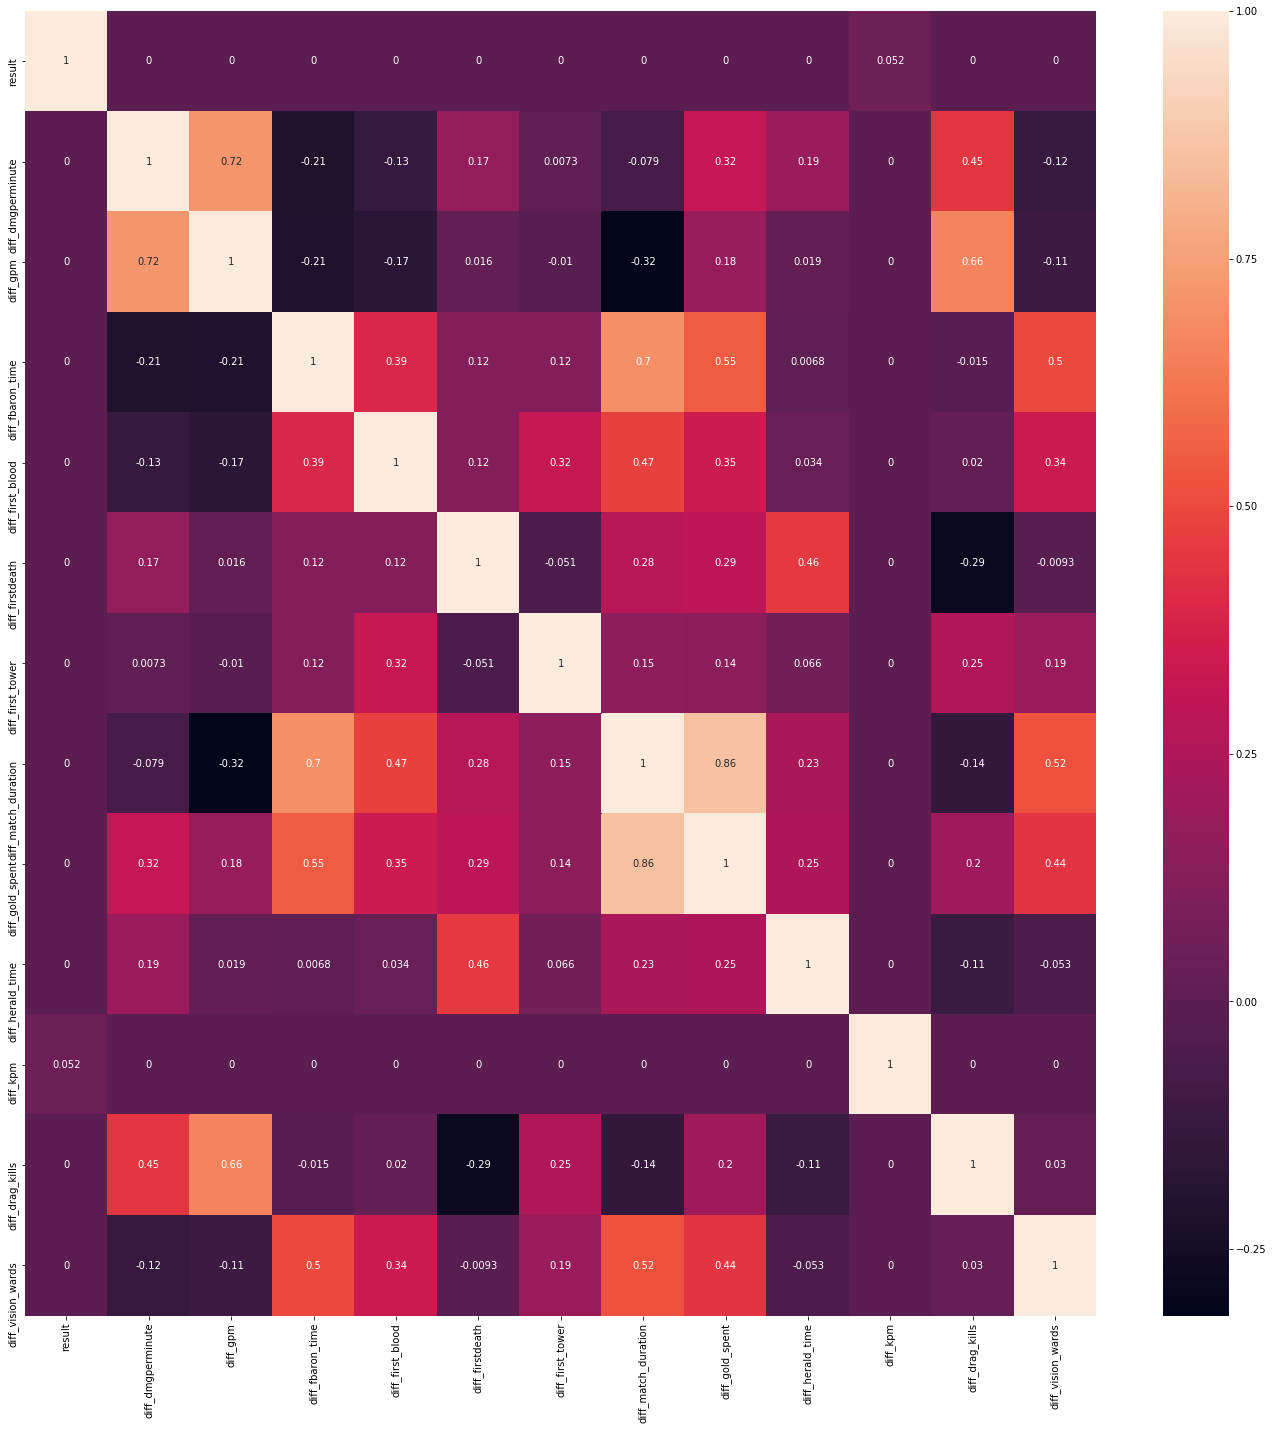

In [9]:
#correlation of each var with each other
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(final_games_data_corr, annot=True)

In [10]:
#convert teams into one hot encoding
le = preprocessing.LabelEncoder()
final_games_data = pd.get_dummies(final_games_data, columns=['team']);
final_games_data.head()

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,1.0,356.557843,87.427176,-0.227462,-0.583637,0.300547,-0.012246,-0.034653,973.662194,0.707009,...,0,0,0,0,0,0,0,0,0,0
1,0.0,356.557843,87.427176,-0.227462,-0.583637,0.300547,-0.012246,-0.034653,973.662194,0.707009,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-92.151108,21.768318,-0.845656,-1.479794,-0.261970,0.422372,-2.570077,-4630.690150,0.562277,...,0,0,0,0,0,0,0,0,0,0
3,0.0,-92.151108,21.768318,-0.845656,-1.479794,-0.261970,0.422372,-2.570077,-4630.690150,0.562277,...,0,1,0,0,0,0,0,0,0,0
4,1.0,39.436662,-0.600782,-0.203241,-0.909650,-0.371647,0.240872,-0.665984,-961.526453,-0.554583,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#splitting data to train
X=final_games_data.drop('result', axis=1)
Y=final_games_data['result']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
#shape of train data
x_train.shape, y_train.shape

((1138, 118), (1138,))

In [ ]:
##shape of test data
x_test.shape, y_test.shape

In [13]:
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [14]:
#prediction using the logistical model from prev cell
y_pred = logistic_model.predict(x_test)

In [15]:
#create dataframe of results
pred_results = pd.DataFrame({'y_test': y_test,
                            'y_pred': y_pred})

In [16]:
#total right and wrong of results
final_games_data_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
final_games_data_crosstab

y_test,0.0,1.0
y_pred,,
0.0,292,215
1.0,282,349


In [19]:
#scores
acc = accuracy_score(y_test, y_pred) #how many of the predicated values did the model get right
prec = precision_score(y_test, y_pred) #how many of the teams that the model thought won actually won
recall = recall_score(y_test, y_pred) #how many of the actual outcomes did the model correctly predict

print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall) #many false negatives

accuracy_score:  0.5632688927943761
precision_score:  0.5530903328050714
recall_score:  0.6187943262411347


In [20]:
final_games_data = final_games_data.sample(frac=1).reset_index(drop=True)
final_games_data.head()

,result,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_match_duration,diff_gold_spent,diff_herald_time,...,team_Team One e-Sports,team_Team SoloMid,team_Unicorns of Love,team_Uppercut,team_Uppercut esports,team_Vega Squadron,team_Vitality,team_Vivo Keyd,team_YouthCREW,team_paiN Gaming
0,1.0,59.372549,-58.676471,-0.882353,2.000000,1.794118,1.843137,-6.098039,-11466.578431,0.519608,...,0,0,0,0,0,0,0,0,0,0
1,1.0,44.298257,66.143028,-0.312309,-0.732789,-0.585948,0.442919,-0.438017,-190.555011,1.059586,...,0,0,0,0,0,0,0,0,0,0
2,0.0,70.192912,91.077590,-0.005562,0.006107,-0.063468,-0.124809,-1.288004,-340.342530,-1.136968,...,0,0,0,0,0,0,0,0,0,0
3,0.0,20.466132,25.238414,0.269162,-1.442513,-0.674688,-0.425579,-1.717469,-2391.049465,-1.721034,...,0,0,0,0,0,0,0,1,0,0
4,1.0,2.412281,-20.067982,-0.140351,-1.188596,1.396930,-1.883772,-0.660088,-2744.032895,0.837719,...,0,0,0,0,0,0,0,0,0,0
